In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import math


# Load the Iris dataset
df=pd.read_csv('Iris.csv')
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Species']
Numerical Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [2]:
# Compare distributions and identify outliers
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:\n", outliers[[col]] if not outliers.empty else "None")

Outliers in Id:
 None
Outliers in SepalLengthCm:
 None
Outliers in SepalWidthCm:
     SepalWidthCm
15           4.4
32           4.1
33           4.2
60           2.0
Outliers in PetalLengthCm:
 None
Outliers in PetalWidthCm:
 None


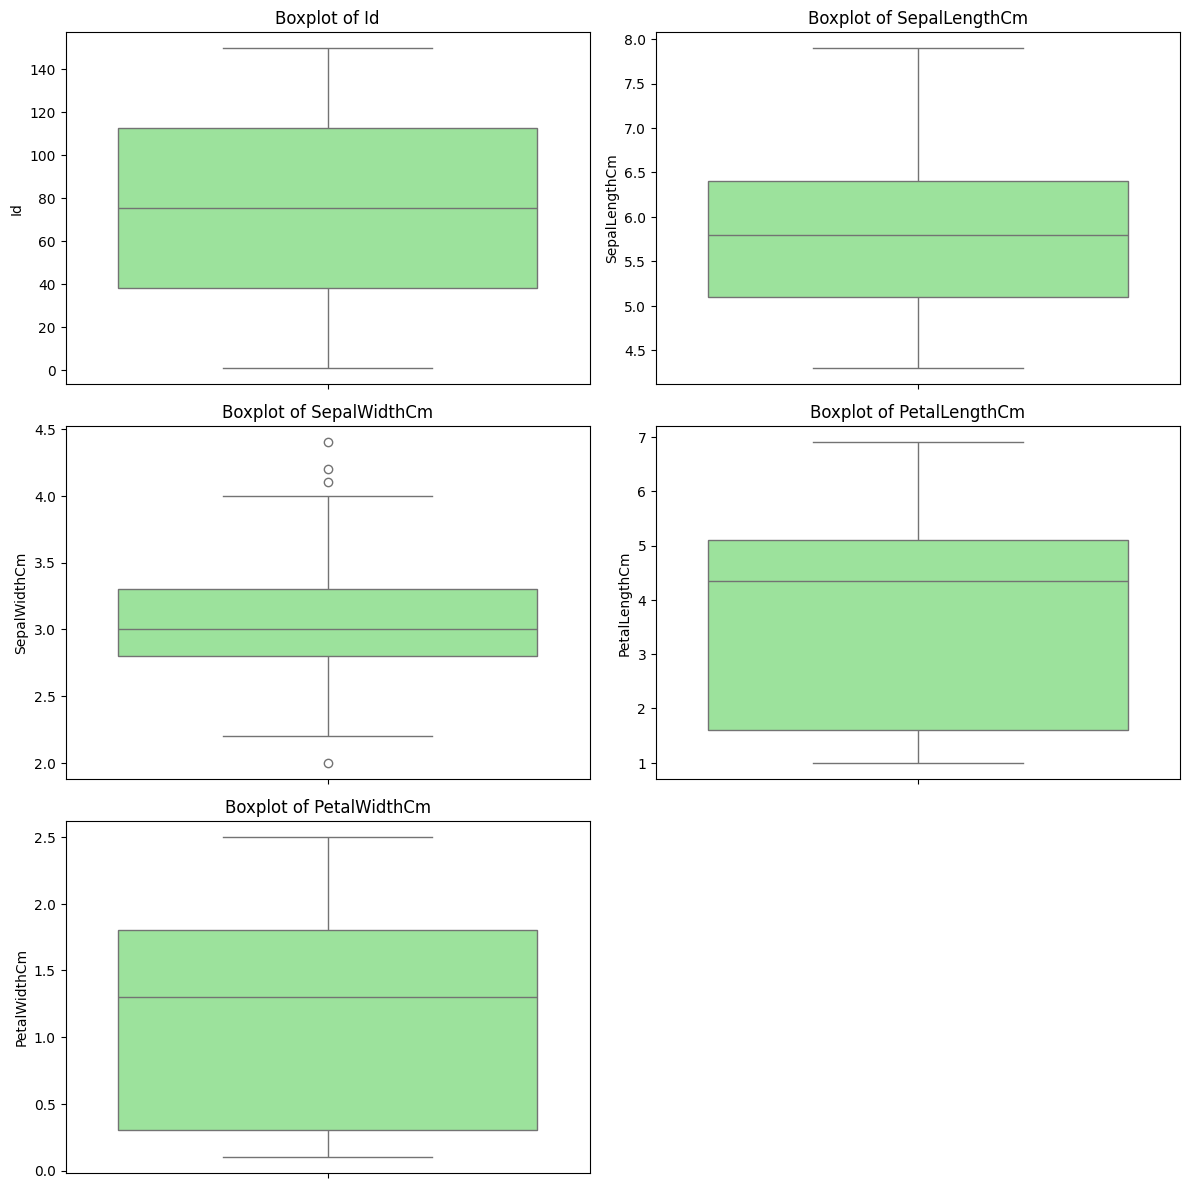

In [3]:
# Calculate number of rows and columns needed
n_cols = 2
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(12, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


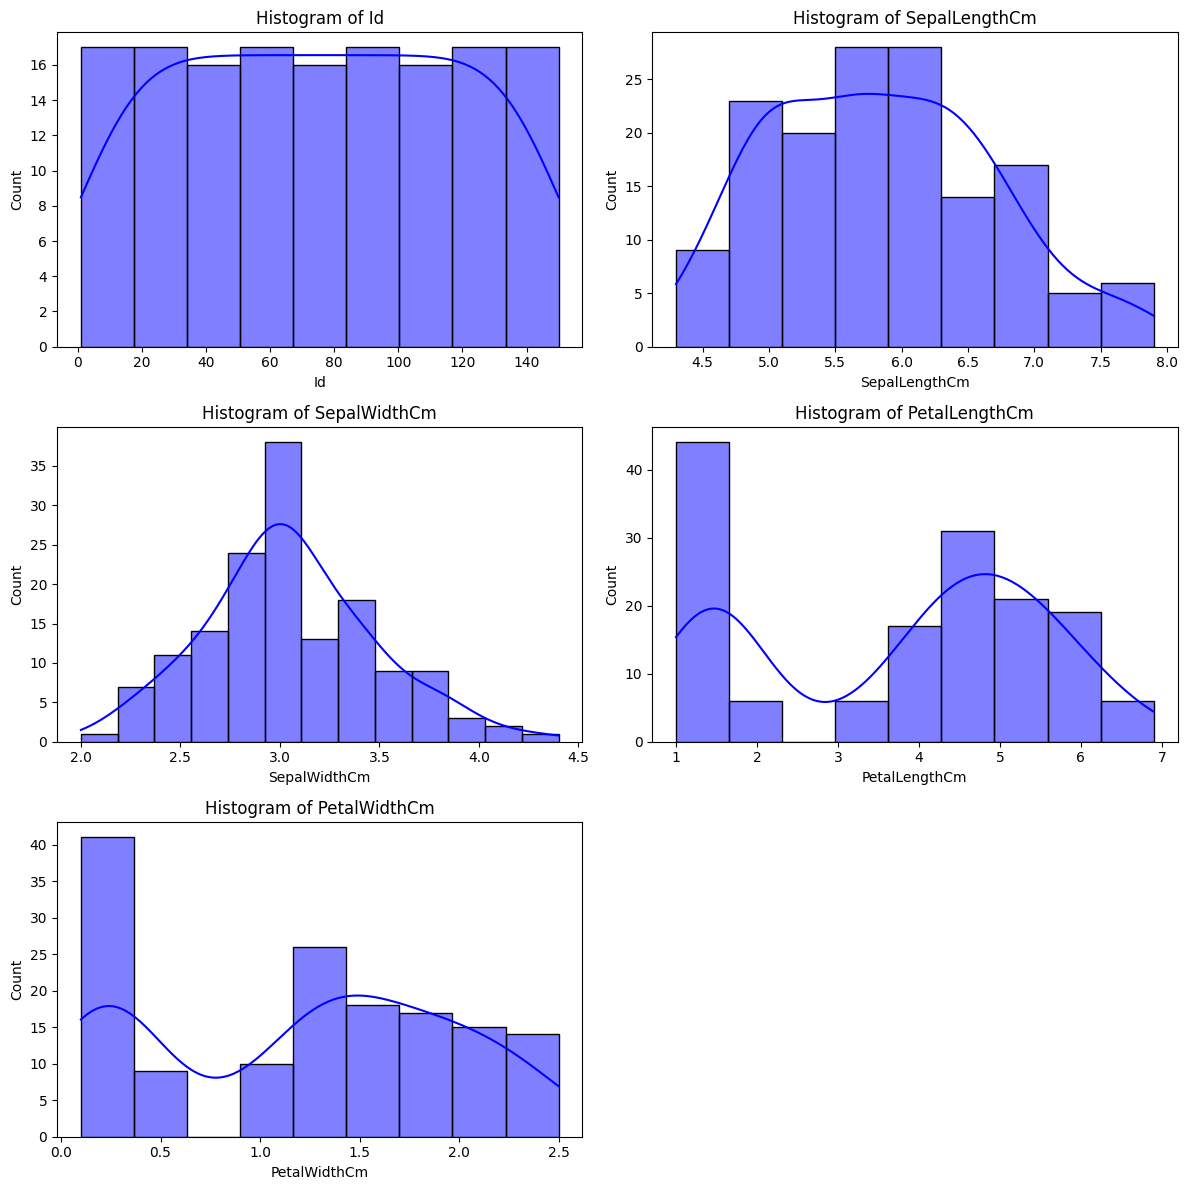

In [4]:
# Set number of columns and compute number of rows needed
n_cols = 2
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(12, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()
